<a href="https://colab.research.google.com/github/sricharan245/Data-Analytics-and-Prediction/blob/Customers-Segmentations-Kmeans/Customer_Segmentation_using_K_Means_Clustering_(Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering using Python

### Created by Sri Charan Bodduna




---


####References
##### learning from https://www.youtube.com/watch?v=SrY0sTJchHE

### Google Drive setup

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

### Reading Dataset

#### I used Mall Customers Dataset for performing K-Means clustering model

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Preprocessing

In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# remove not useful fields

cleaned_data = data.drop(columns = ["CustomerID",	"Genre",	"Age"]).values
cleaned_data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Exploratory Data Analysis

I have used various charts for performing unvariate and bivariate analysis

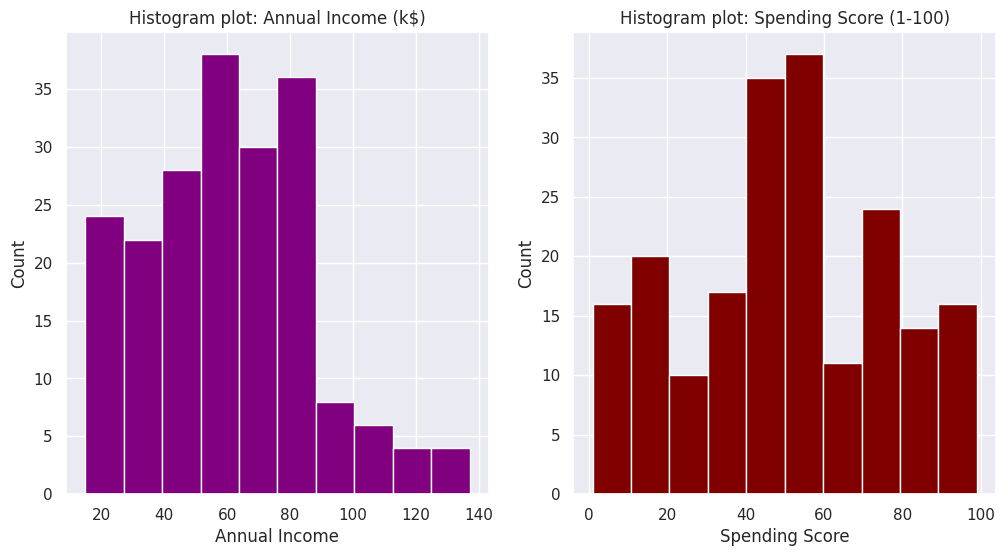

In [7]:
sns.set()
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(cleaned_data[:, 0], color="purple")
plt.title("Histogram plot: Annual Income (k$)")
# plt.xticks(range(0, 140, 10))
plt.xlabel("Annual Income")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(cleaned_data[:, 1], color="maroon")
plt.title("Histogram plot: Spending Score (1-100)")
plt.xlabel("Spending Score")
plt.ylabel("Count")


plt.show()

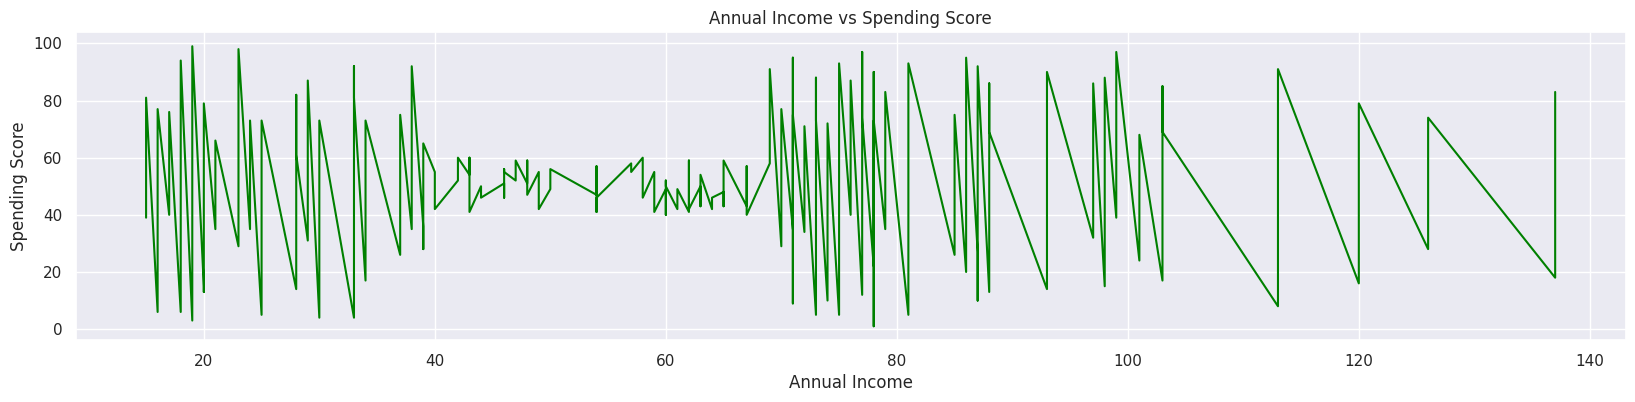

In [8]:
sns.set()
plt.figure(figsize=(20, 4))
plt.plot(cleaned_data[:,0], cleaned_data[:, 1], c="green")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income vs Spending Score")
plt.show()

### Finding Optimal K Value

I have created model for different k values ranging from 1 to 10

Next, I plotted Elblow curve between WCSS(With clusters Sum of Squares) vs values of K

In [9]:
# Finding optimal K value

WCSS = []

for i in range(1, 11):
  kmeans_model = KMeans(n_clusters=i, init="k-means++", random_state=21)
  kmeans_model.fit(cleaned_data)
  WCSS.append(kmeans_model.inertia_)

In [10]:
WCSS

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 31280.903845940935,
 24986.52564064288,
 21818.114588452176,
 19692.557418227763]

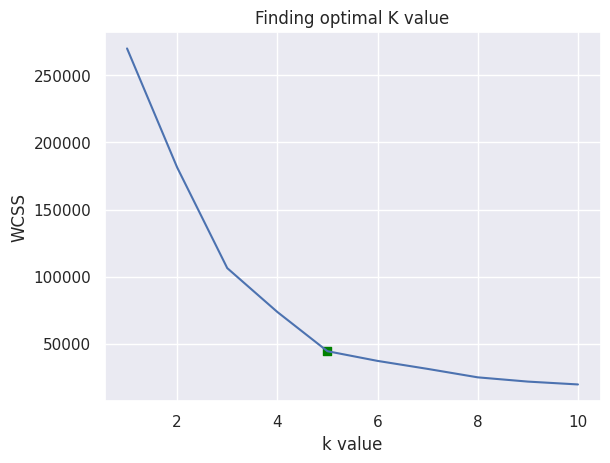

In [11]:
sns.set()
plt.plot(range(1,11), WCSS)
plt.title("Finding optimal K value")
plt.xlabel("k value")
plt.ylabel("WCSS")
plt.scatter(5, 44448.4554479337, marker="s", c="green")

#### I found that optimal K value is 5

### Modelling : K-Means Clustering

I have used K-Means clustering model for my analysis on customers

In [12]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
pred = kmeans.fit_predict(cleaned_data)
print (pred)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


### Visualizing the results on Scatter Plot

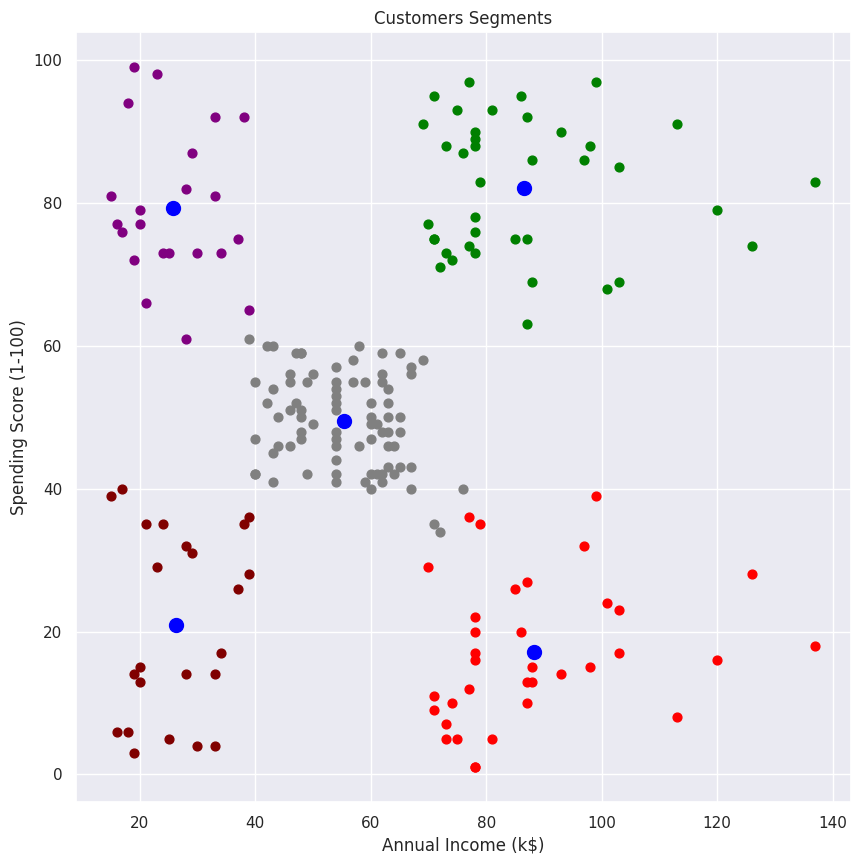

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(cleaned_data[pred == 0, 0], cleaned_data[pred == 0, 1], s=40, c='red', label="Cluster 0")
plt.scatter(cleaned_data[pred == 1, 0], cleaned_data[pred == 1, 1], s=40, c='grey', label="Cluster 1")
plt.scatter(cleaned_data[pred == 2, 0], cleaned_data[pred == 2, 1], s=40, c='green', label="Cluster 2")
plt.scatter(cleaned_data[pred == 3, 0], cleaned_data[pred == 3, 1], s=40, c='purple', label="Cluster 3")
plt.scatter(cleaned_data[pred == 4, 0], cleaned_data[pred == 4, 1], s=40, c='maroon', label="Cluster 4")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="blue")

plt.title("Customers Segments")
plt.xlabel(data.columns[3])
plt.ylabel(data.columns[4])
plt.show()

## Conclusions

1. From the Elbow curve, we understood that optimal K value for this dataset is 5.


2. We can interpret various segments of customers who is having different annual income and spending score.


3. You can see that customers having lesser income with smaller spending score are grouped in brown color. Customers with higher annual income and lower spending score are clustered in red, etc.


4. You can understand that red colored cluster have potential to shop more since they are having higher annual income and lower spending score. **Company can provide membership offers, benefits, etc.**

5. The cluster which is in brown with lower annual income and lower spending scores, **we can improve their spending power by providing exclusive offers and gift vouchers.**


6. Cluster with grey in color, are neutral in their annual income and spending score.


7. Cluster with green in color, I have higher annual income and good spending score. **These customers are the one who can generate good amounts of revenue.**


